In [ ]:
import tensorflow as tf

In [ ]:
# Helper libraries
import os
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
import pathlib


%matplotlib inline

## Install Kaggle

In [ ]:
 ! pip install -q kaggle

## Import Kaggle.json File

In [ ]:
from google.colab import files

files.upload()

{}

In [ ]:
 ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

# Install 100 Sports dataset

In [ ]:
! kaggle datasets download -d gpiosenka/sports-classification

100% 477M/477M [00:15<00:00, 46.7MB/s]
100% 477M/477M [00:15<00:00, 32.8MB/s]


In [ ]:
! unzip sports-classification.zip -d sports-classification

## Set Parameters

In [ ]:
num_classes = 100
batch_size = 128
img_height = 224
img_width = 224

## training, validation and test set

In [ ]:
Train_Path = pathlib.Path("/content/sports-classification/train")
Valid_Path = pathlib.Path("/content/sports-classification/valid")
Test_Path = pathlib.Path("/content/sports-classification/test")

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    Train_Path,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 13572 files belonging to 100 classes.


In [ ]:
valid_ds = tf.keras.utils.image_dataset_from_directory(
    Valid_Path,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 500 files belonging to 100 classes.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    Test_Path,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 500 files belonging to 100 classes.


###  Class name for each sport in train set





In [ ]:
class_names = train_ds.class_names

In [ ]:
print(class_names)

['air hockey', 'ampute football', 'archery', 'arm wrestling', 'axe throwing', 'balance beam', 'barell racing', 'baseball', 'basketball', 'baton twirling', 'bike polo', 'billiards', 'bmx', 'bobsled', 'bowling', 'boxing', 'bull riding', 'bungee jumping', 'canoe slamon', 'cheerleading', 'chuckwagon racing', 'cricket', 'croquet', 'curling', 'disc golf', 'fencing', 'field hockey', 'figure skating men', 'figure skating pairs', 'figure skating women', 'fly fishing', 'football', 'formula 1 racing', 'frisbee', 'gaga', 'giant slalom', 'golf', 'hammer throw', 'hang gliding', 'harness racing', 'high jump', 'hockey', 'horse jumping', 'horse racing', 'horseshoe pitching', 'hurdles', 'hydroplane racing', 'ice climbing', 'ice yachting', 'jai alai', 'javelin', 'jousting', 'judo', 'lacrosse', 'log rolling', 'luge', 'motorcycle racing', 'mushing', 'nascar racing', 'olympic wrestling', 'parallel bar', 'pole climbing', 'pole dancing', 'pole vault', 'polo', 'pommel horse', 'rings', 'rock climbing', 'roller 

###  Number of classes in train set

In [ ]:
len(train_ds.class_names)

100

### Class distribution in training set

In [ ]:
ds = train_ds.unbatch()
arr = np.array(list(ds.as_numpy_iterator()))

In [ ]:
classes, counts = np.unique(arr[:, 1], return_counts=True)
plt.figure(figsize=((25), (20)))
plt.barh(class_names, counts)
plt.title('Class distribution in training set')

### Class distribution in validation set

In [ ]:
ds = valid_ds.unbatch()
arr = np.array(list(ds.as_numpy_iterator()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


Text(0.5, 1.0, 'Class distribution in validation set')

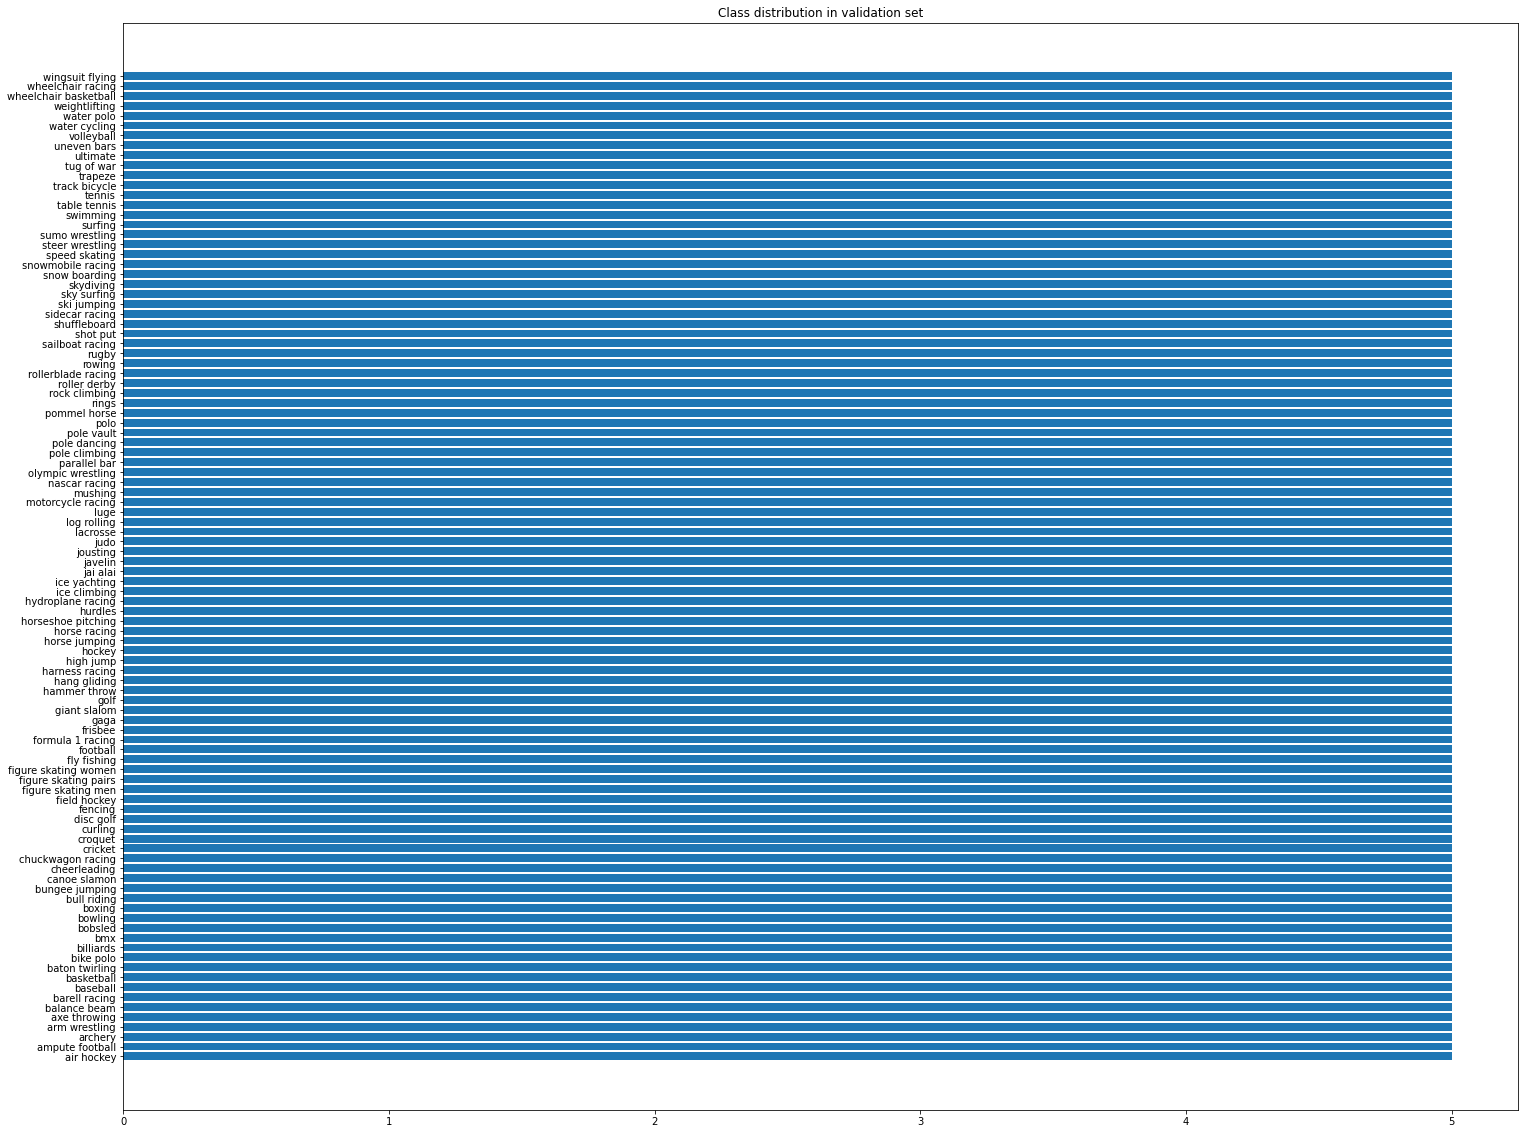

In [ ]:
classes, counts = np.unique(arr[:, 1], return_counts=True) # note that all valid classes has only 5 images --> see folder test/...
plt.figure(figsize=((25), (20)))
plt.barh(class_names, counts)
plt.title('Class distribution in validation set')

### Class distribution in testing set

In [ ]:
ds = test_ds.unbatch()
arr = np.array(list(ds.as_numpy_iterator()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


Text(0.5, 1.0, 'Class distribution in testing set')

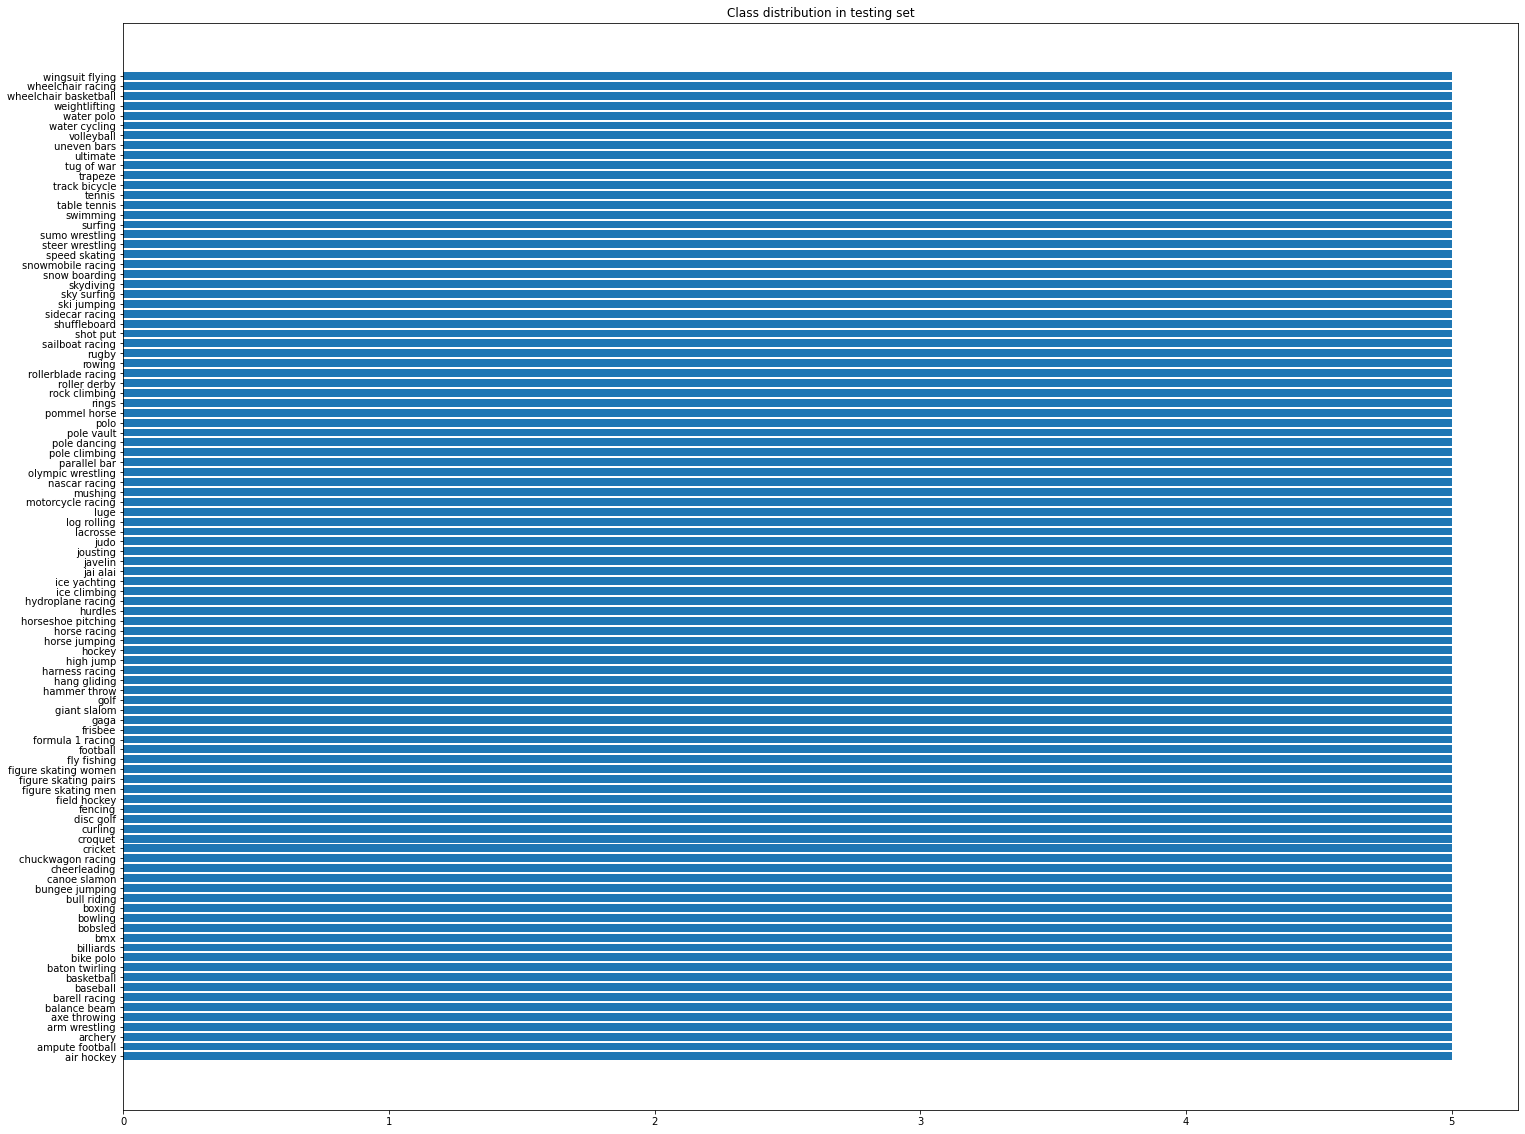

In [ ]:
classes, counts = np.unique(arr[:, 1], return_counts=True) # note that all test classes has only 5 images --> see folder test/...
plt.figure(figsize=((25), (20)))
plt.barh(class_names, counts)
plt.title('Class distribution in testing set')

## Images from the datasets  
### Show images from train set

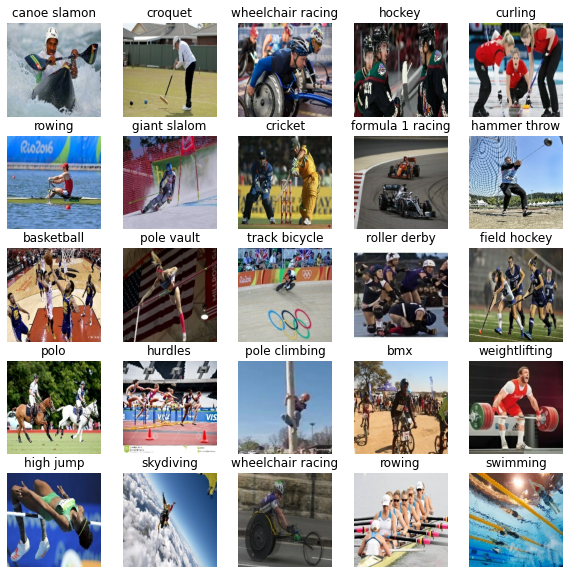

In [ ]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Show images from valid set

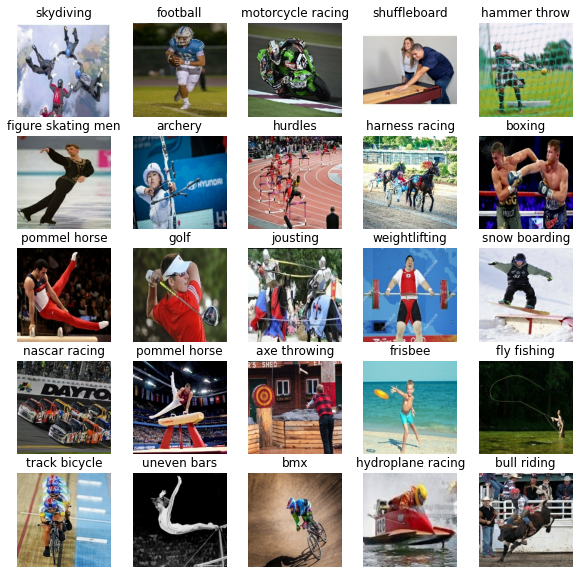

In [ ]:
class_names = valid_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in valid_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Show images from test set

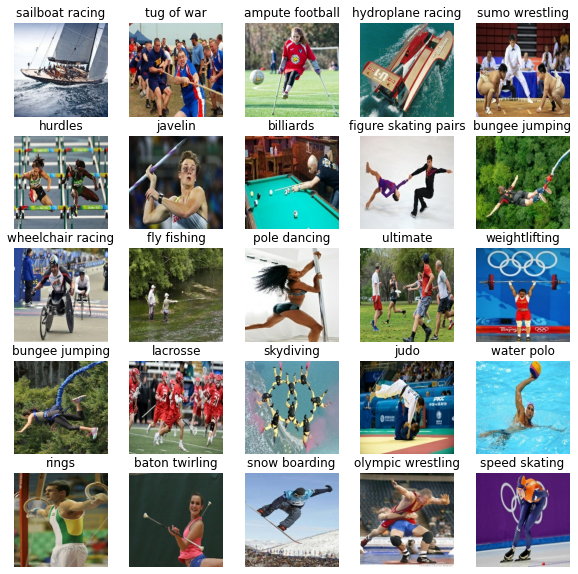

In [ ]:
class_names = test_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Convolutional Neural Network to train Sports dataset
## Setup the layers


##### Data Augmentation 

In [ ]:
model1 = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes)
])

## Setting Hyperparameters

In [ ]:
model1.compile(optimizer='RMSprop', # set the optimizer
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # loss function
    metrics=['accuracy']) #accuracy metric



In [ ]:
history1 = model1.fit(train_ds,epochs=10, validation_data=valid_ds)
print("PERFOMANCE",model1.evaluate(test_ds))

Epoch 1/10
213/213 [==============================] - 112s 519ms/step - loss: 4.9592 - accuracy: 0.0274 - val_loss: 8.5439 - val_accuracy: 0.0180
Epoch 2/10
213/213 [==============================] - 110s 515ms/step - loss: 3.8312 - accuracy: 0.1110 - val_loss: 5.1096 - val_accuracy: 0.0840
Epoch 3/10
213/213 [==============================] - 111s 517ms/step - loss: 3.1312 - accuracy: 0.2297 - val_loss: 5.4572 - val_accuracy: 0.0820
Epoch 4/10
213/213 [==============================] - 111s 519ms/step - loss: 2.4885 - accuracy: 0.3663 - val_loss: 2.9859 - val_accuracy: 0.2920
Epoch 5/10
213/213 [==============================] - 111s 521ms/step - loss: 1.8683 - accuracy: 0.5077 - val_loss: 3.6808 - val_accuracy: 0.2960
Epoch 6/10
213/213 [==============================] - 111s 520ms/step - loss: 1.3186 - accuracy: 0.6380 - val_loss: 3.0759 - val_accuracy: 0.3460
Epoch 7/10
213/213 [==============================] - 111s 521ms/step - loss: 0.8354 - accuracy: 0.7612 - val_loss: 4.1282 -

In [ ]:
model1.summary()

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

### Training and Validation Accuracy

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.show()


### Training and Validation Loss

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


## Set Parameters

In [ ]:
num_classes = 100
batch_size = 64
img_height = 224
img_width = 224

## training, validation and test set

In [ ]:
Train_Path = pathlib.Path("/content/sports-classification/train")
Valid_Path = pathlib.Path("/content/sports-classification/valid")
Test_Path = pathlib.Path("/content/sports-classification/test")

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    Train_Path,
    image_size=(img_height, img_width),
    batch_size=batch_size)

In [ ]:
valid_ds = tf.keras.utils.image_dataset_from_directory(
    Valid_Path,
    image_size=(img_height, img_width),
    batch_size=batch_size)

In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    Test_Path,
    image_size=(img_height, img_width),
    batch_size=batch_size)

###  Class name for each sport in train set





In [ ]:
class_names = train_ds.class_names

In [ ]:
print(class_names)

###  Number of classes in train set

In [ ]:
len(train_ds.class_names)

### Class distribution in training set

In [ ]:
ds = train_ds.unbatch()
arr = np.array(list(ds.as_numpy_iterator()))

In [ ]:
classes, counts = np.unique(arr[:, 1], return_counts=True)
plt.figure(figsize=((25), (20)))
plt.barh(class_names, counts)
plt.title('Class distribution in training set')

### Class distribution in validation set

In [ ]:
ds = valid_ds.unbatch()
arr = np.array(list(ds.as_numpy_iterator()))

In [ ]:
classes, counts = np.unique(arr[:, 1], return_counts=True) # note that all valid classes has only 5 images --> see folder test/...
plt.figure(figsize=((25), (20)))
plt.barh(class_names, counts)
plt.title('Class distribution in validation set')

### Class distribution in testing set

In [ ]:
ds = test_ds.unbatch()
arr = np.array(list(ds.as_numpy_iterator()))

In [ ]:
classes, counts = np.unique(arr[:, 1], return_counts=True) # note that all test classes has only 5 images --> see folder test/...
plt.figure(figsize=((25), (20)))
plt.barh(class_names, counts)
plt.title('Class distribution in testing set')

## Images from the datasets  
### Show images from train set

In [ ]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Show images from valid set

In [ ]:
class_names = valid_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in valid_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Show images from test set

In [ ]:
class_names = test_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Transfer Learning 

## MoblieNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image

In [ ]:
batch_size2 = 128
IMAGE_SIZE = (img_height, img_width)

### Augmentation for training set

In [ ]:
train_data_generator = image.ImageDataGenerator(
                                            horizontal_flip=True,
#                                             zoom_range=0.15,
#                                             width_shift_range=0.2,
#                                             height_shift_range=0.2,
#                                             shear_range=0.15,
                                            preprocessing_function=preprocess_input
                                            )

In [ ]:
# No Augmentation for valid and test
test_data_generator = image.ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = train_data_generator.flow_from_directory(directory= Train_Path,
                                                    target_size=IMAGE_SIZE,
                                                    color_mode= 'rgb',
                                                    class_mode= 'categorical',
                                                    batch_size= batch_size2)

val_generator = test_data_generator.flow_from_directory(directory= Valid_Path,
                                                    target_size=IMAGE_SIZE,
                                                    color_mode= 'rgb',
                                                    class_mode= 'categorical',
                                                    batch_size= batch_size2)

test_generator = test_data_generator.flow_from_directory(directory= Test_Path,
                                                    target_size=IMAGE_SIZE,
                                                    color_mode= 'rgb',
                                                    class_mode= 'categorical',
                                                    batch_size= batch_size2)

### Build The Transfer Model

In [ ]:
base = MobileNetV2(weights='imagenet', include_top=False)
base.trainable = False

model = Sequential([
    base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(num_classes)
])

In [ ]:
model.compile(
    optimizer="RMSprop",
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [ ]:
model.summary()

### Training the model

In [ ]:
history = model.fit(train_generator, validation_data=val_generator, epochs=10)
print("PERFOMANCE",model.evaluate(test_generator))

### Plot Training History

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

### Training and Validation Accuracy

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.show()

### Training and Validation Loss

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## VGG19

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image

In [ ]:
batch_size2 = 128
IMAGE_SIZE = (img_height, img_width)

### Augmentation for training set

In [ ]:
train_data_generator = image.ImageDataGenerator(
                                            horizontal_flip=True,
#                                             zoom_range=0.15,
#                                             width_shift_range=0.2,
#                                             height_shift_range=0.2,
#                                             shear_range=0.15,
                                            preprocessing_function=preprocess_input
                                            )

In [ ]:
# No Augmentation for valid and test
test_data_generator = image.ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = train_data_generator.flow_from_directory(directory= Train_Path,
                                                    target_size=IMAGE_SIZE,
                                                    color_mode= 'rgb',
                                                    class_mode= 'categorical',
                                                    batch_size= batch_size2)

val_generator = test_data_generator.flow_from_directory(directory= Valid_Path,
                                                    target_size=IMAGE_SIZE,
                                                    color_mode= 'rgb',
                                                    class_mode= 'categorical',
                                                    batch_size= batch_size2)

test_generator = test_data_generator.flow_from_directory(directory= Test_Path,
                                                    target_size=IMAGE_SIZE,
                                                    color_mode= 'rgb',
                                                    class_mode= 'categorical',
                                                    batch_size= batch_size2)

### Build The Transfer Model

In [ ]:
base = VGG19(weights='imagenet', include_top=False)
base.trainable = False

model = Sequential([
    base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(num_classes)
])

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [ ]:
model.summary()

### Training the model

In [ ]:
history = model.fit(train_generator, validation_data=val_generator, epochs=100)
print("PERFOMANCE",model.evaluate(test_generator))

### Plot Training History

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

### Training and Validation Accuracy

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.show()

### Training and Validation Loss

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('loss')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## ResNet101V2

In [ ]:
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image

In [ ]:
batch_size2 = 128
IMAGE_SIZE = (img_height, img_width)

### Augmentation for training set

In [ ]:
train_data_generator = image.ImageDataGenerator(
                                            horizontal_flip=True,
#                                             zoom_range=0.15,
#                                             width_shift_range=0.2,
#                                             height_shift_range=0.2,
#                                             shear_range=0.15,
                                            preprocessing_function=preprocess_input
                                            )

In [ ]:
# No Augmentation for valid and test
test_data_generator = image.ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = train_data_generator.flow_from_directory(directory= Train_Path,
                                                    target_size=IMAGE_SIZE,
                                                    color_mode= 'rgb',
                                                    class_mode= 'categorical',
                                                    batch_size= batch_size2)

val_generator = test_data_generator.flow_from_directory(directory= Valid_Path,
                                                    target_size=IMAGE_SIZE,
                                                    color_mode= 'rgb',
                                                    class_mode= 'categorical',
                                                    batch_size= batch_size2)

test_generator = test_data_generator.flow_from_directory(directory= Test_Path,
                                                    target_size=IMAGE_SIZE,
                                                    color_mode= 'rgb',
                                                    class_mode= 'categorical',
                                                    batch_size= batch_size2)

Found 13572 images belonging to 100 classes.
Found 500 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


### Build The Transfer Model

In [ ]:
base = ResNet101V2(weights='imagenet', include_top=False)
base.trainable = False

model = Sequential([
    base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(num_classes)
])

171327488/171317808 [==============================] - 4s 0us/step


In [ ]:
model.compile(
    optimizer="RMSprop",
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, None, None, 2048)  42626560  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                        

### Training the model

In [ ]:
history = model.fit(train_generator, validation_data=val_generator, epochs=10)
print("PERFOMANCE",model.evaluate(test_generator))

Epoch 1/10
107/107 [==============================] - 167s 1s/step - loss: 1.8320 - accuracy: 0.5411 - val_loss: 0.7073 - val_accuracy: 0.7700
Epoch 2/10
107/107 [==============================] - 140s 1s/step - loss: 0.7218 - accuracy: 0.7917 - val_loss: 0.4045 - val_accuracy: 0.8820
Epoch 3/10
107/107 [==============================] - 140s 1s/step - loss: 0.4763 - accuracy: 0.8530 - val_loss: 0.4244 - val_accuracy: 0.8580
Epoch 4/10
107/107 [==============================] - 140s 1s/step - loss: 0.3598 - accuracy: 0.8864 - val_loss: 0.3429 - val_accuracy: 0.9040
Epoch 5/10
107/107 [==============================] - 140s 1s/step - loss: 0.2647 - accuracy: 0.9153 - val_loss: 0.3067 - val_accuracy: 0.9080
Epoch 6/10
107/107 [==============================] - 140s 1s/step - loss: 0.2079 - accuracy: 0.9335 - val_loss: 0.2810 - val_accuracy: 0.9160
Epoch 7/10
107/107 [==============================] - 140s 1s/step - loss: 0.1707 - accuracy: 0.9453 - val_loss: 0.3237 - val_accuracy: 0.8960

### Plot Training History

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

### Training and Validation Accuracy

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')
plt.show()

### Training and Validation Loss

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()